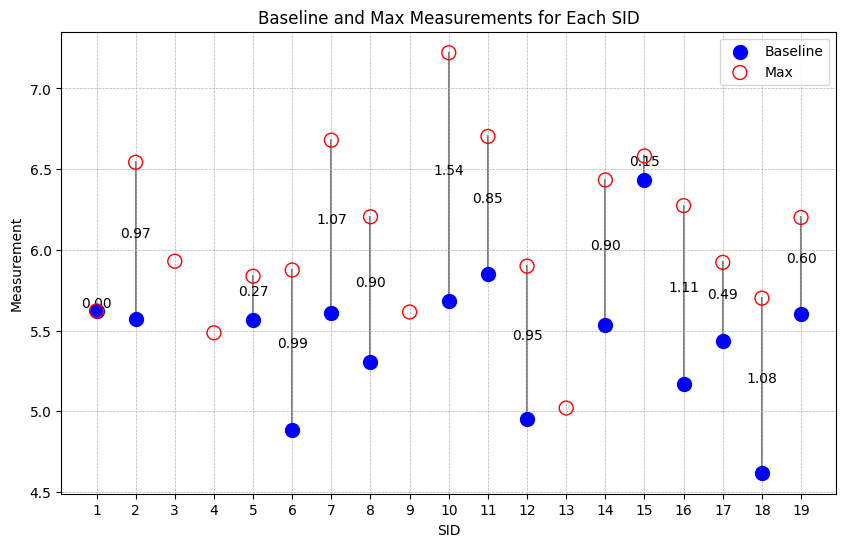

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# Provided data
data = {
    "SID": range(1, 20),
    "Baseline": [5.621782752, 5.568778042, None, None, 5.562744548, 4.88501557, 5.609744451, 
                 5.306995802, None, 5.681352663, 5.852106684, 4.951752436, None, 5.535537221, 
                 6.42961825, 5.168017845, 5.433778811, 4.618981569, 5.604371109],
    "Max": [5.621799224, 6.542215743, 5.929373961, 5.485857654, 5.836465903, 5.874936169, 
            6.679238874, 6.204660343, 5.614711653, 7.221070213, 6.702560805, 5.898852381, 
            5.019797328, 6.432898772, 6.581430788, 6.273776982, 5.92216056, 5.700399085, 
            6.200373278]
}

df_plot = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Baseline and Max points
for _, row in df_plot.iterrows():
    if pd.notnull(row['Baseline']):
        plt.scatter(row['SID'], row['Baseline'], color='blue', label='Baseline', s=100, zorder=5)
    plt.scatter(row['SID'], row['Max'], facecolors='none', edgecolors='red', label='Max', s=100, zorder=5)
    
    # Draw line and label if both Baseline and Max are present
    if pd.notnull(row['Baseline']):
        plt.plot([row['SID'], row['SID']], [row['Baseline'], row['Max']], color='grey', zorder=1)
        distance = row['Max'] - row['Baseline']
        plt.text(row['SID'], (row['Baseline'] + row['Max']) / 2, f"{distance:.2f}", 
                 ha='center', va='bottom', color='black')

plt.xlabel('SID')
plt.ylabel('Measurement')
plt.title('Baseline and Max Measurements for Each SID')
plt.xticks(range(1, 20))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
plt.legend(by_label.values(), by_label.keys())

plt.show()


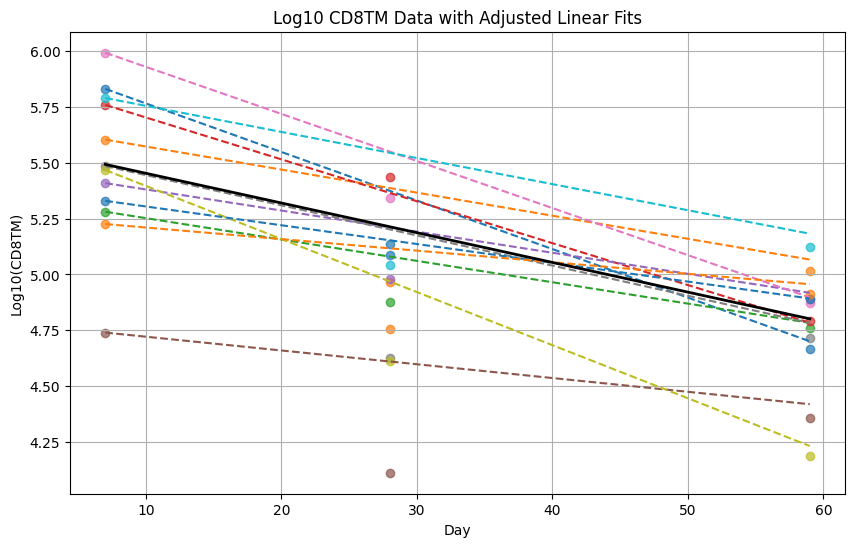

{np.int64(103): np.float64(0.05011447557853371),
 np.int64(107): np.float64(0.02381190521107681),
 np.int64(110): np.float64(0.022056519890211665),
 np.int64(111): np.float64(0.043242008951711396),
 np.int64(112): np.float64(0.021779750844856477),
 np.int64(204): np.float64(0.014217110470575119),
 np.int64(207): np.float64(0.04859159499376484),
 np.int64(302): np.float64(0.031126810411550188),
 np.int64(307): np.float64(0.05479614307285052),
 np.int64(308): np.float64(0.026941688432759504),
 np.int64(311): np.float64(0.01938271374024091),
 np.int64(312): np.float64(0.011940565731546183),
 'Combined': np.float64(0.030666773944139764)}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the data
file_path = '../Data/Rahil_2020/RahilTMLong.xlsx'
data = pd.read_excel(file_path)

# Add a new column with the log10 of CD8TM values
data['LOG10_CD8TM'] = np.log10(data['CD8TM'])

# Plotting
volunteers = data['VOLUNTEER'].unique()
plt.figure(figsize=(10, 6))

adjusted_slopes_log10 = {}

for volunteer in volunteers:
    subset = data[data['VOLUNTEER'] == volunteer]
    
    # Anchor the trend line at Day 7
    day_7_value = subset[subset['DAY'] == 7]['LOG10_CD8TM'].values[0]
    slope, _, _, _, _ = linregress(subset['DAY'], subset['LOG10_CD8TM'])
    adjusted_slopes_log10[volunteer] = slope
    
    # Adjust intercept to match Day 7 data point
    adjusted_intercept = day_7_value - slope * 7
    fit_line = slope * subset['DAY'] + adjusted_intercept
    
    # Scatter plot and adjusted trend line for each volunteer
    plt.scatter(subset['DAY'], subset['LOG10_CD8TM'], label=f'Volunteer {volunteer}', alpha=0.7)
    plt.plot(subset['DAY'], fit_line, linestyle='--', label=f'Adjusted Fit Volunteer {volunteer}')

# Combined fit anchored at the average Day 7 value
day_7_mean = data[data['DAY'] == 7]['LOG10_CD8TM'].mean()
combined_slope, _, _, _, _ = linregress(data['DAY'], data['LOG10_CD8TM'])
adjusted_slopes_log10['Combined'] = combined_slope
adjusted_combined_intercept = day_7_mean - combined_slope * 7
days_range = np.linspace(7, 59, 100)
combined_fit_adjusted = combined_slope * days_range + adjusted_combined_intercept

# Plot combined trend
plt.plot(days_range, combined_fit_adjusted, color='black', linewidth=2, label='Adjusted Combined Fit')

# Labeling the plot
plt.title('Log10 CD8TM Data with Adjusted Linear Fits')
plt.xlabel('Day')
plt.ylabel('Log10(CD8TM)')
#plt.legend()
plt.grid()
plt.show()

# Convert adjusted slopes from log10 to normal space decay slopes
normal_space_adjusted_slopes = {key: -slope * np.log(10) for key, slope in adjusted_slopes_log10.items()}

# Display the normal space decay slopes
normal_space_adjusted_slopes
